<a href="https://colab.research.google.com/github/sreyan-ghosh/ml_revision/blob/master/tinkering_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concepts of OpenCV
Tinkering and creating mini utilities.

## Setup
Cloning into a repo that contains the files we are going to deal with during the course of this endeavour.

In [2]:
!git clone https://github.com/misbah4064/opencvTutorial
%cd opencvTutorial/
from IPython.display import clear_output
clear_output()

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

## OpenCV Basics - Changing Color Profiles of Images

In [13]:
# RGB image containing 3 channels
image = cv2.imread('./images/color.jpg')
# cv2_imshow(image)
print(image.shape)

# Grayscale image containing just 1 channel
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray)
print(gray.shape)

# HSV image - Hue, Saturation, Variance
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# cv2_imshow(hsv)
print(hsv.shape)

# Why HSV?
# The HSV format stands for Hue Saturation Value. In this format, we 
# do not have to scourge through all the 3 channels in RGB to get the 
# color information of the image, in HSV, it is all stored in the first
# channel or the Hue channel. This makes the information stored in H all 
# we need for dealing with color images.

(476, 640, 3)
(476, 640)
(476, 640, 3)


## Basics of OpenCV - Edge Detection

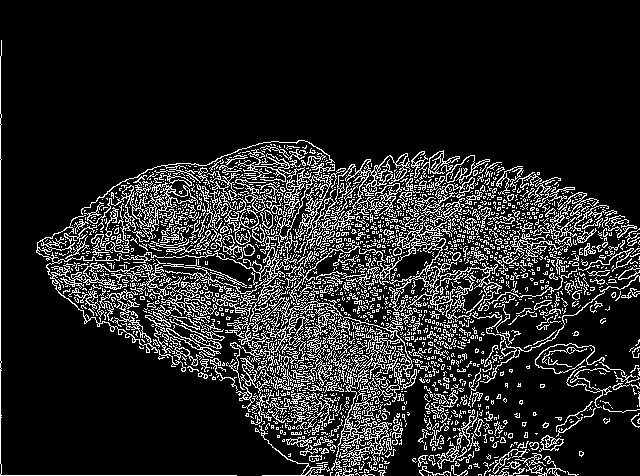

In [33]:
# Canny Edge Detection
# This is a kind of edge detection that only works on GRAY images.

canny_img = cv2.Canny(gray, 100, 100)
# cv2_imshow(canny_img)
# This algorithm gives all the edges in the image depending on the filter size.

# Using OTSU method, choosing the perfect size for the filter
upper_thresh, thresh_im = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lower_thresh = 0.5*upper_thresh;
canny_img = cv2.Canny(gray, lower_thresh, upper_thresh)
cv2_imshow(canny_img)

### Erosion and Dilation
Eroding an image refers to removing noise from it using a filter. Depending on the filter size information is removed from the image. 
Dilation is the opposite of erosion. It amplifies the data stored in an image.

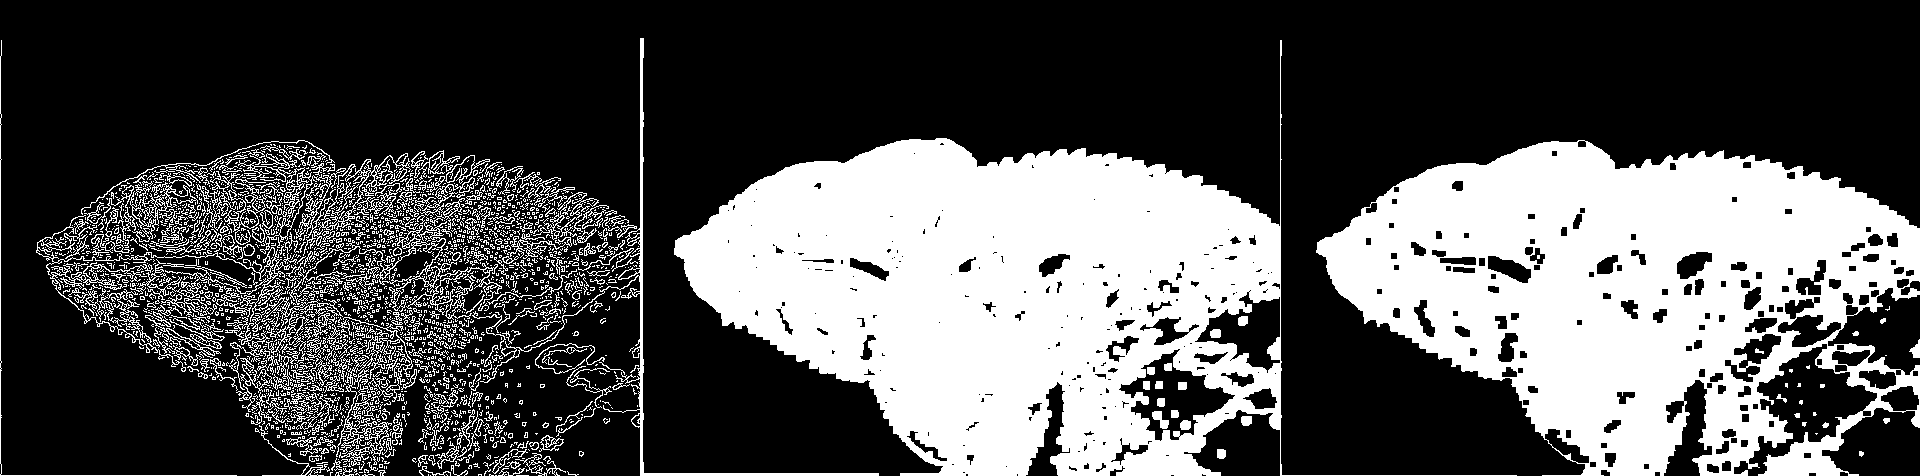

In [34]:
# setting the kernel size
kernel = np.ones((5,5), np.uint8)

# Dilation
dilated_img = cv2.dilate(canny_img, kernel, iterations=1)
# cv2_imshow(dilated_img)

# Erosion
eroded_img = cv2.erode(dilated_img, kernel, iterations=1)
# cv2_imshow(eroded_img)

disp_img = np.hstack((canny_img, dilated_img, eroded_img))
cv2_imshow(disp_img)

# Edge detection is used in real-life in lane detection.

## Basics of OpenCV - Removing Noise from an Image

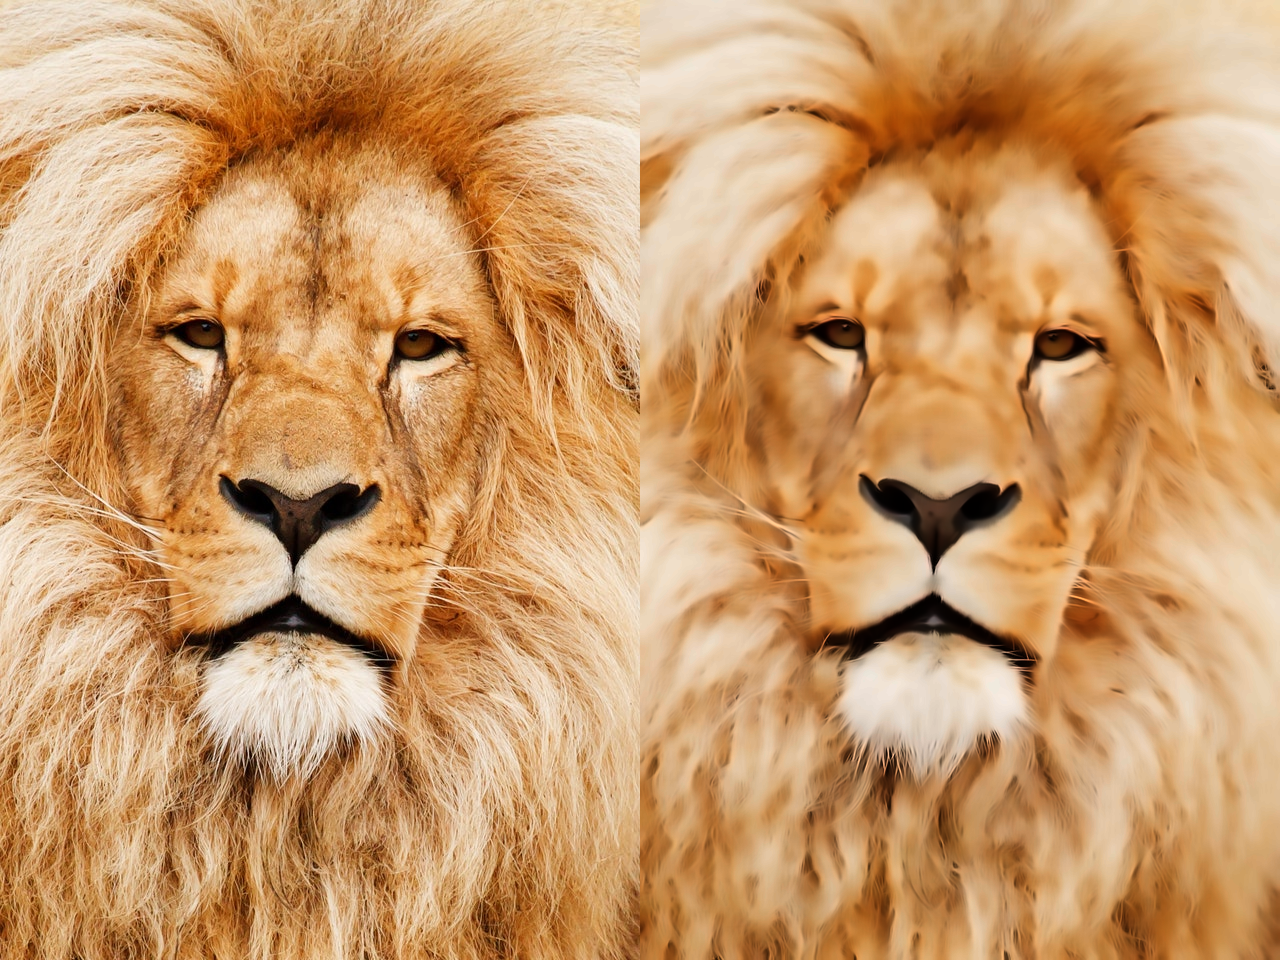

In [36]:
image = cv2.imread("images/lion.jpg")
# cv2_imshow(image)

denoised_img = cv2.fastNlMeansDenoisingColored(image, None, 20, 20 , 7, 15)
# https://docs.opencv.org/master/d1/d79/group__photo__denoise.html#ga21abc1c8b0e15f78cd3eff672cb6c476

disp_img = np.hstack((image, denoised_img))
cv2_imshow(disp_img)

## Basics of OpenCV - Drawing and Writing on an image

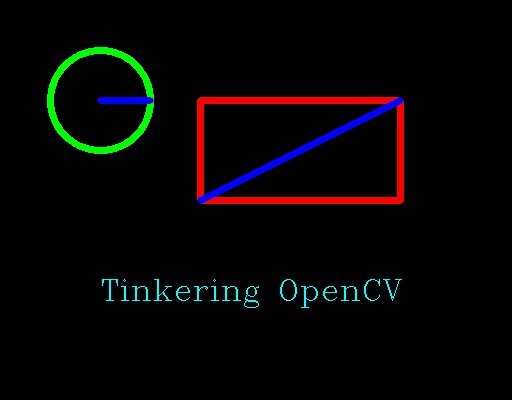

In [61]:
# creating an all black image
img = np.zeros((400,512,3), np.uint8)

# Drawing a circle
cv2.circle(img, (100,100), 50, (0,255,0), 5)

# Drawing a rectangle
cv2.rectangle(img, (200, 100), (400, 200), (0,0,255), 5)

# Drawing a line
cv2.line(img, (100, 100), (150,100), (255,0,0), 5)
cv2.line(img, (200, 200), (400,100), (255,0,0), 5)

# Writing text
cv2.putText(img, "Tinkering OpenCV", (100, 300), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,0))

cv2_imshow(img)

## Intermediate OpenCV - Color Detection

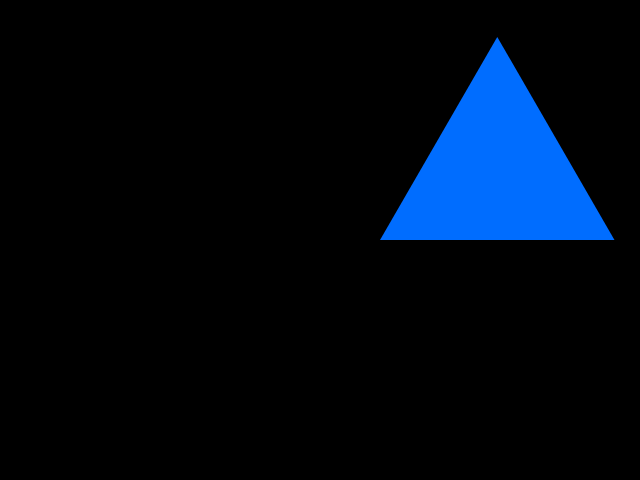

In [69]:
image = cv2.imread("images/shapes.png")
# cv2_imshow(image)

# Converting to HSV format for easier manipulation
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Extracting the required mask color
lower_hue = np.array([65,0,0])
upper_hue = np.array([110,255,255])
# Here we have used hue values between (65,110) that is for blue.
# The other values are:
# Red: (0,20)
# Green: (46,91)
# Yellow: (21,45)

# Creating a mask that allows only the required color
mask = cv2.inRange(hsv, lower_hue, upper_hue)
# cv2_imshow(mask)
result = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(result)

## Intermediate OpenCV - Face Detection